<font color='red'><h1> Edge Based Segmentation using Robert Operator </h1></font>

### This workbook is the python implementation of edge based segmentation using robert operator.

Importing libraries

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.filters import sobel
from skimage.segmentation import watershed
from skimage.color import rgb2gray
import scipy.ndimage as ndi

Input images

In [2]:
img = cv2.imread('images/5.bmp')

In [3]:
img.shape

(512, 512, 3)

In [4]:
img = rgb2gray(img)

In [6]:
filtered_image = np.zeros((np.size(img,0), np.size(img,1)))

In [7]:
Mx = [[1,0], [0,-1]]
My = [[0,1], [-1,0]]

In [10]:
for i in range(1,np.size(img, 0) - 1):
    for j in range(1,np.size(img, 1) - 1):
        Gx = sum(sum(Mx*img[i:i+2, j:j+2]));
        Gy = sum(sum(My*img[i:i+2, j:j+2]));
        filtered_image[i, j] = np.sqrt((Gx**2) + (Gy**2));

In [11]:
filtered_image

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.04072088, 0.01941287, ..., 0.04245993, 0.02873197,
        0.        ],
       [0.        , 0.03675757, 0.06417174, ..., 0.00448794, 0.0319091 ,
        0.        ],
       ...,
       [0.        , 0.08490756, 0.05949348, ..., 0.02464882, 0.1742002 ,
        0.        ],
       [0.        , 0.11827774, 0.09055195, ..., 0.03924463, 0.15878574,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

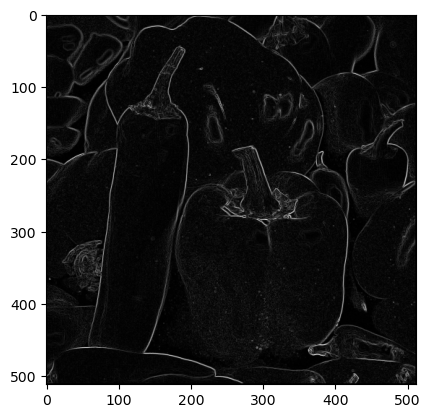

In [12]:
plt.imshow(filtered_image, cmap='gray')

In [13]:
thresholdValue = 0.1

In [14]:
output_image = np.maximum(filtered_image, thresholdValue)

In [15]:
output_image[output_image == 0.1] = 255
output_image[output_image != 255] = 0

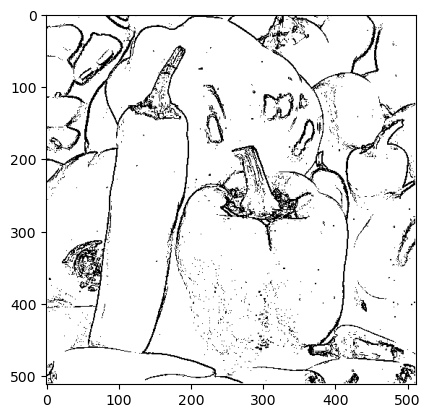

In [16]:
plt.imshow(output_image, cmap='gray')